In [1]:
import torch
import utils
import dataset
from model import Model
import train

In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = dataset.get_train_data_loader(**dataloader_args)
test_loader = dataset.get_test_data_loader(**dataloader_args)

CUDA Available? True
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


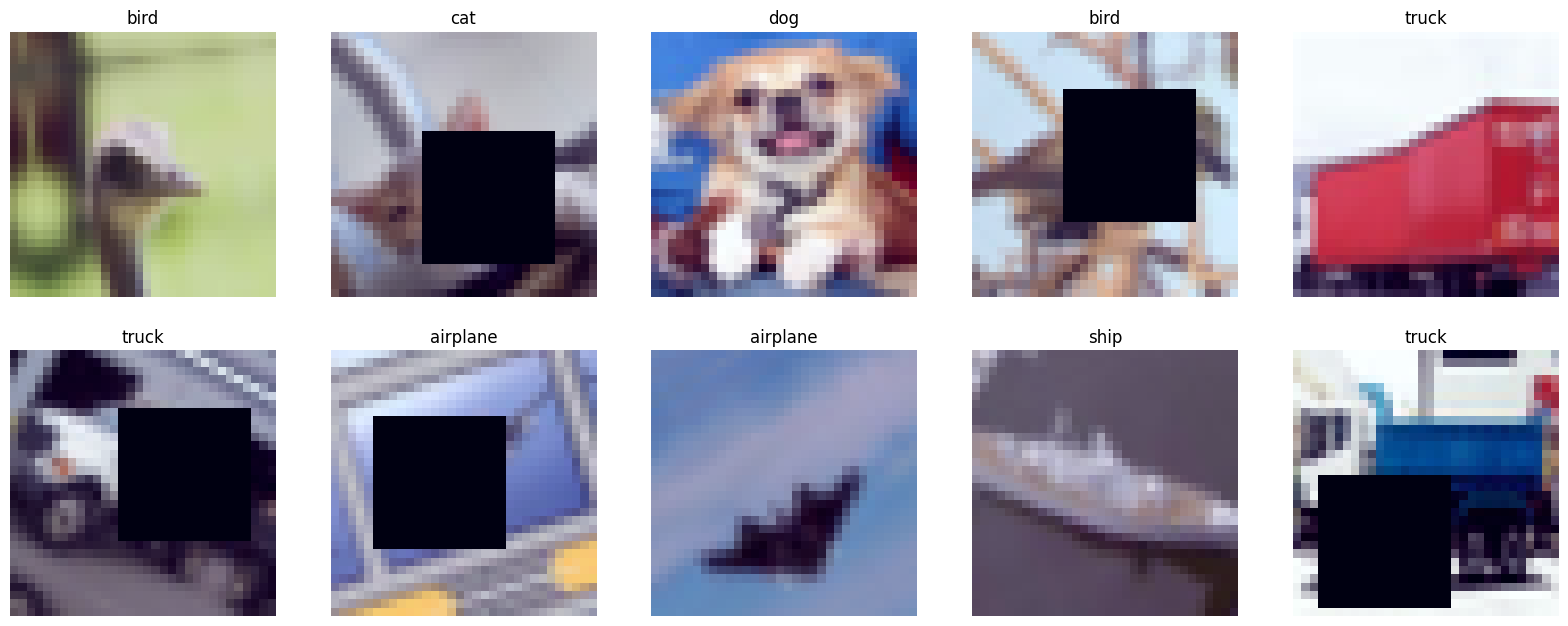

In [3]:
utils.plot_samples(train_loader)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 30, 30]           2,304
             ReLU-10           [-1, 16, 30, 30]               0
      BatchNorm2d-11           [-1, 16, 30, 30]              32
          Dropout-12           [-1, 16, 30, 30]               0
           Conv2d-13           [-1, 32, 30, 30]           4,608
             ReLU-14           [-1

In [12]:
model = Model().to(device)
optimizer = utils.get_SGD_optimizer(model, lr=0.01, momentum=0.9)
scheduler = utils.get_StepLR_scheduler(optimizer, step_size=150, gamma=0.1)
criterion = utils.get_criterion()
num_epoch = 50

train_losses, train_acc, test_losses, test_acc = train.start_training(
    num_epoch, model, device, train_loader, test_loader, optimizer, criterion,
    scheduler
)

Epoch 1


Train: Loss=1.6764 Batch_id=390 Accuracy=33.17: 100%|██████████| 391/391 [00:17<00:00, 22.71it/s]


Test set: Average loss: 1.4971, Accuracy: 4379/10000 (43.79%)

Epoch 2


Train: Loss=1.2699 Batch_id=390 Accuracy=43.51: 100%|██████████| 391/391 [00:17<00:00, 22.89it/s]


Test set: Average loss: 1.2706, Accuracy: 5367/10000 (53.67%)

Epoch 3


Train: Loss=1.2842 Batch_id=390 Accuracy=48.33: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


Test set: Average loss: 1.1633, Accuracy: 5830/10000 (58.30%)

Epoch 4


Train: Loss=1.3299 Batch_id=390 Accuracy=51.86: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]


Test set: Average loss: 1.1164, Accuracy: 6032/10000 (60.32%)

Epoch 5


Train: Loss=1.2362 Batch_id=390 Accuracy=54.08: 100%|██████████| 391/391 [00:18<00:00, 21.33it/s]


Test set: Average loss: 1.0227, Accuracy: 6248/10000 (62.48%)

Epoch 6


Train: Loss=1.1222 Batch_id=390 Accuracy=56.15: 100%|██████████| 391/391 [00:17<00:00, 22.93it/s]


Test set: Average loss: 0.9852, Accuracy: 6502/10000 (65.02%)

Epoch 7


Train: Loss=1.2273 Batch_id=390 Accuracy=57.41: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]


Test set: Average loss: 0.9325, Accuracy: 6681/10000 (66.81%)

Epoch 8


Train: Loss=1.1481 Batch_id=390 Accuracy=58.63: 100%|██████████| 391/391 [00:17<00:00, 22.86it/s]


Test set: Average loss: 0.8900, Accuracy: 6872/10000 (68.72%)

Epoch 9


Train: Loss=1.1108 Batch_id=390 Accuracy=59.98: 100%|██████████| 391/391 [00:17<00:00, 21.96it/s]


Test set: Average loss: 0.8730, Accuracy: 6884/10000 (68.84%)

Epoch 10


Train: Loss=1.1272 Batch_id=390 Accuracy=61.40: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]


Test set: Average loss: 0.8192, Accuracy: 7095/10000 (70.95%)

Epoch 11


Train: Loss=1.1163 Batch_id=390 Accuracy=62.10: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]


Test set: Average loss: 0.7814, Accuracy: 7279/10000 (72.79%)

Epoch 12


Train: Loss=0.9622 Batch_id=390 Accuracy=63.12: 100%|██████████| 391/391 [00:16<00:00, 23.12it/s]


Test set: Average loss: 0.7465, Accuracy: 7398/10000 (73.98%)

Epoch 13


Train: Loss=1.0336 Batch_id=390 Accuracy=63.88: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]


Test set: Average loss: 0.7687, Accuracy: 7310/10000 (73.10%)

Epoch 14


Train: Loss=0.9112 Batch_id=390 Accuracy=64.59: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]


Test set: Average loss: 0.7250, Accuracy: 7511/10000 (75.11%)

Epoch 15


Train: Loss=1.3032 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]


Test set: Average loss: 0.7035, Accuracy: 7587/10000 (75.87%)

Epoch 16


Train: Loss=1.0154 Batch_id=390 Accuracy=65.91: 100%|██████████| 391/391 [00:17<00:00, 22.69it/s]


Test set: Average loss: 0.6974, Accuracy: 7564/10000 (75.64%)

Epoch 17


Train: Loss=0.8970 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]


Test set: Average loss: 0.6814, Accuracy: 7632/10000 (76.32%)

Epoch 18


Train: Loss=0.9797 Batch_id=390 Accuracy=67.03: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]


Test set: Average loss: 0.6497, Accuracy: 7761/10000 (77.61%)

Epoch 19


Train: Loss=0.9971 Batch_id=390 Accuracy=67.24: 100%|██████████| 391/391 [00:18<00:00, 21.48it/s]


Test set: Average loss: 0.6449, Accuracy: 7762/10000 (77.62%)

Epoch 20


Train: Loss=0.8513 Batch_id=390 Accuracy=68.13: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]


Test set: Average loss: 0.6451, Accuracy: 7795/10000 (77.95%)

Epoch 21


Train: Loss=0.8169 Batch_id=390 Accuracy=68.29: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]


Test set: Average loss: 0.6252, Accuracy: 7860/10000 (78.60%)

Epoch 22


Train: Loss=0.8700 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:17<00:00, 22.98it/s]


Test set: Average loss: 0.6191, Accuracy: 7890/10000 (78.90%)

Epoch 23


Train: Loss=0.7791 Batch_id=390 Accuracy=69.04: 100%|██████████| 391/391 [00:19<00:00, 20.24it/s]


Test set: Average loss: 0.5987, Accuracy: 7893/10000 (78.93%)

Epoch 24


Train: Loss=1.1322 Batch_id=390 Accuracy=69.59: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


Test set: Average loss: 0.6154, Accuracy: 7869/10000 (78.69%)

Epoch 25


Train: Loss=0.6467 Batch_id=390 Accuracy=69.39: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]


Test set: Average loss: 0.5976, Accuracy: 7971/10000 (79.71%)

Epoch 26


Train: Loss=0.9107 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:17<00:00, 22.43it/s]


Test set: Average loss: 0.5933, Accuracy: 7982/10000 (79.82%)

Epoch 27


Train: Loss=1.0081 Batch_id=390 Accuracy=70.27: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]


Test set: Average loss: 0.5518, Accuracy: 8142/10000 (81.42%)

Epoch 28


Train: Loss=0.8247 Batch_id=390 Accuracy=70.75: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]


Test set: Average loss: 0.5725, Accuracy: 8046/10000 (80.46%)

Epoch 29


Train: Loss=0.6857 Batch_id=390 Accuracy=70.79: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]


Test set: Average loss: 0.5721, Accuracy: 8015/10000 (80.15%)

Epoch 30


Train: Loss=0.6871 Batch_id=390 Accuracy=70.91: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]


Test set: Average loss: 0.5647, Accuracy: 8055/10000 (80.55%)

Epoch 31


Train: Loss=0.8321 Batch_id=390 Accuracy=71.31: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]


Test set: Average loss: 0.5523, Accuracy: 8066/10000 (80.66%)

Epoch 32


Train: Loss=0.7269 Batch_id=390 Accuracy=71.41: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]


Test set: Average loss: 0.5343, Accuracy: 8143/10000 (81.43%)

Epoch 33


Train: Loss=0.9462 Batch_id=390 Accuracy=71.46: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s]


Test set: Average loss: 0.5306, Accuracy: 8177/10000 (81.77%)

Epoch 34


Train: Loss=0.9258 Batch_id=390 Accuracy=71.79: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Test set: Average loss: 0.5255, Accuracy: 8194/10000 (81.94%)

Epoch 35


Train: Loss=0.8290 Batch_id=390 Accuracy=71.79: 100%|██████████| 391/391 [00:18<00:00, 20.92it/s]


Test set: Average loss: 0.5221, Accuracy: 8248/10000 (82.48%)

Epoch 36


Train: Loss=0.8105 Batch_id=390 Accuracy=72.20: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]


Test set: Average loss: 0.5219, Accuracy: 8219/10000 (82.19%)

Epoch 37


Train: Loss=0.8683 Batch_id=390 Accuracy=72.21: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]


Test set: Average loss: 0.5159, Accuracy: 8222/10000 (82.22%)

Epoch 38


Train: Loss=0.7304 Batch_id=390 Accuracy=72.47: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]


Test set: Average loss: 0.5207, Accuracy: 8244/10000 (82.44%)

Epoch 39


Train: Loss=0.6286 Batch_id=390 Accuracy=72.78: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]


Test set: Average loss: 0.5118, Accuracy: 8273/10000 (82.73%)

Epoch 40


Train: Loss=0.8322 Batch_id=390 Accuracy=72.59: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]


Test set: Average loss: 0.5013, Accuracy: 8287/10000 (82.87%)

Epoch 41


Train: Loss=0.7006 Batch_id=390 Accuracy=72.90: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]


Test set: Average loss: 0.4994, Accuracy: 8286/10000 (82.86%)

Epoch 42


Train: Loss=0.9449 Batch_id=390 Accuracy=72.89: 100%|██████████| 391/391 [00:18<00:00, 21.17it/s]


Test set: Average loss: 0.5108, Accuracy: 8275/10000 (82.75%)

Epoch 43


Train: Loss=0.4679 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]


Test set: Average loss: 0.5149, Accuracy: 8281/10000 (82.81%)

Epoch 44


Train: Loss=0.8080 Batch_id=390 Accuracy=73.16: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]


Test set: Average loss: 0.5070, Accuracy: 8276/10000 (82.76%)

Epoch 45


Train: Loss=0.8866 Batch_id=390 Accuracy=73.31: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]


Test set: Average loss: 0.5167, Accuracy: 8264/10000 (82.64%)

Epoch 46


Train: Loss=0.6521 Batch_id=390 Accuracy=73.44: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]


Test set: Average loss: 0.4939, Accuracy: 8289/10000 (82.89%)

Epoch 47


Train: Loss=0.9509 Batch_id=390 Accuracy=73.46: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]


Test set: Average loss: 0.4981, Accuracy: 8325/10000 (83.25%)

Epoch 48


Train: Loss=0.7262 Batch_id=390 Accuracy=73.41: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]


Test set: Average loss: 0.4884, Accuracy: 8366/10000 (83.66%)

Epoch 49


Train: Loss=0.6639 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]


Test set: Average loss: 0.4926, Accuracy: 8345/10000 (83.45%)

Epoch 50


Train: Loss=0.6382 Batch_id=390 Accuracy=74.10: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]


Test set: Average loss: 0.4811, Accuracy: 8379/10000 (83.79%)



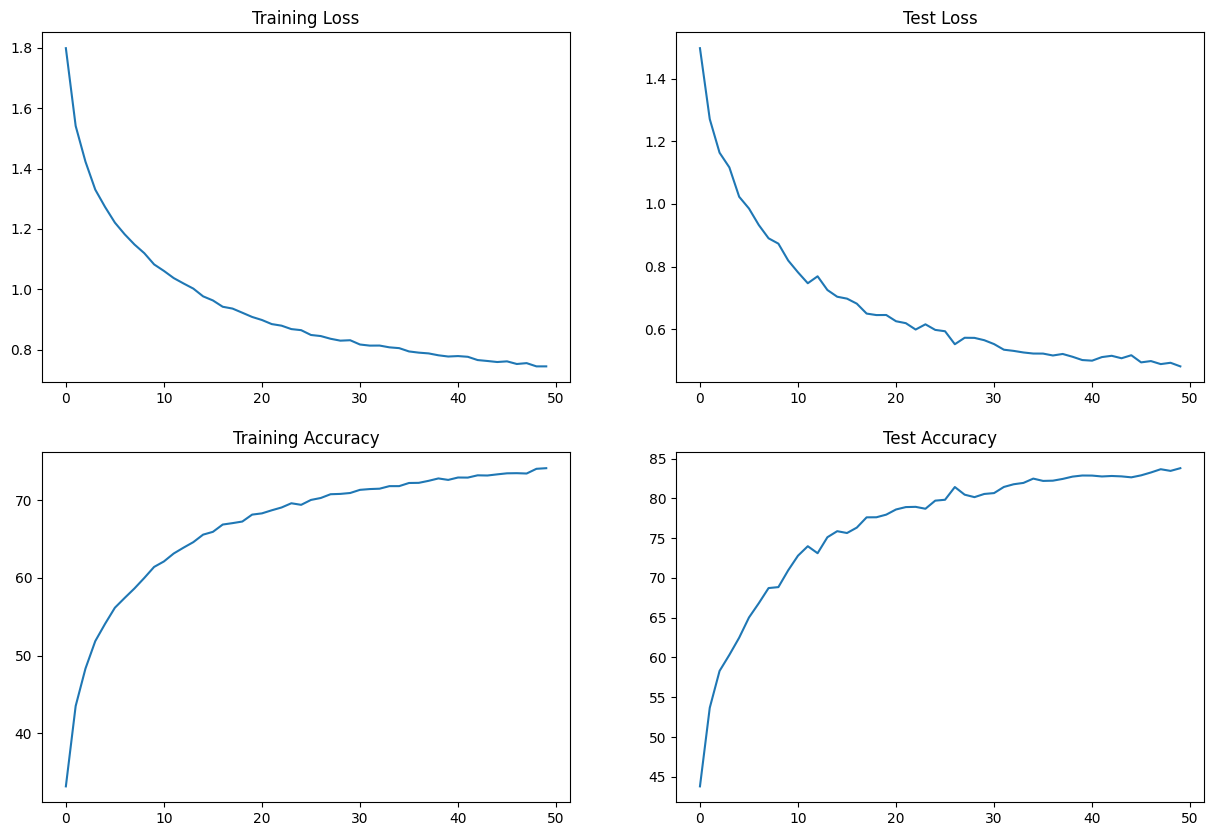

In [13]:
utils.plot_accuracy_loss_graphs(train_losses, train_acc, test_losses, test_acc)

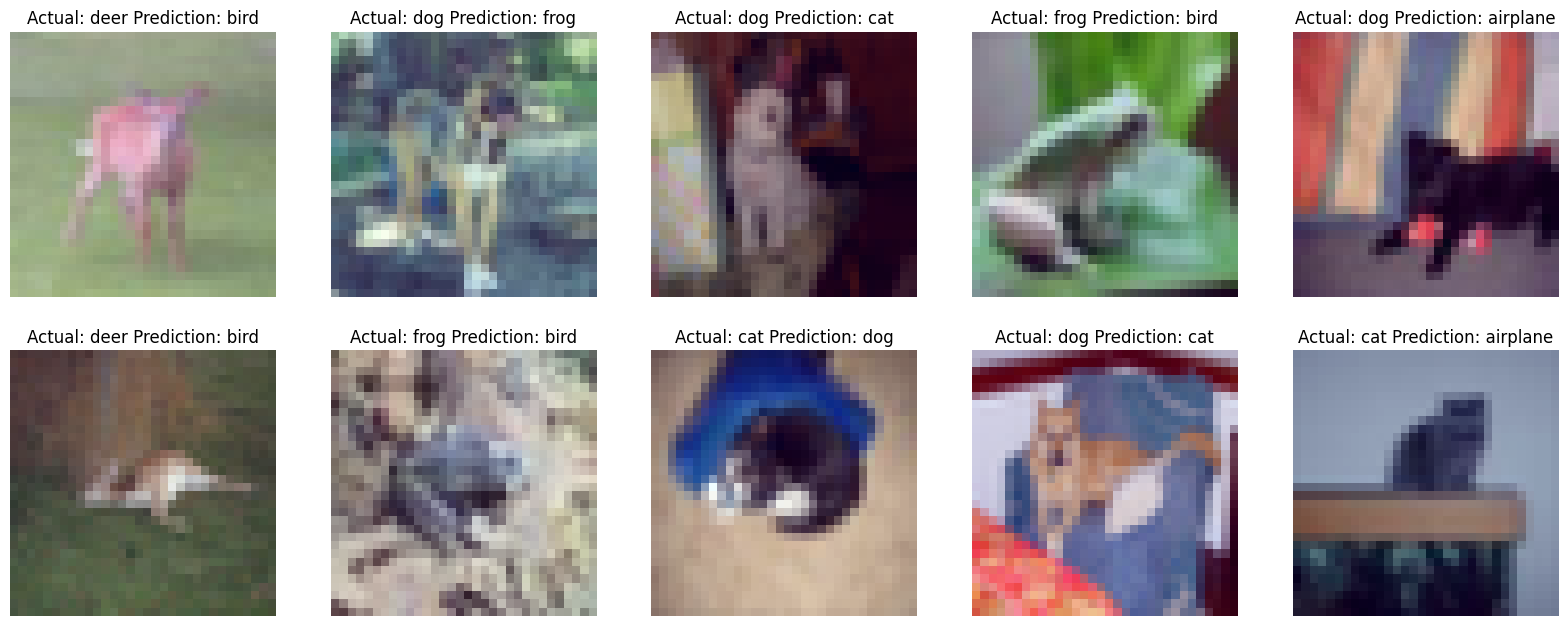

In [14]:
utils.plot_missclassified_images(device, model, test_loader)